# Redes Neuronales - Trabajo Práctico N° 2 - Ejercicio 1 - Regresión Logística
# Notebook #3: Implementación de un modelo MLP
En esta notebook se busca aprovechar los conocimientos de las anteriores e implementar un modelo MLP para poder estimar la condición de diabético de un paciente, perteneciente al Pima Indians Dataset analizado en la primer notebook.
### Integrantes del grupo
* Kammann, Lucas Agustín
* Gaytan, Joaquín Oscar

# 1. Cargando base de datos

In [1]:
import numpy as np

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
import importlib

In [4]:
# Read database from .csv
df = pd.read_csv('../../databases/diabetes.csv', delimiter=',')

# Show first rows of data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 2. Preprocesamiento de los datos

## 2.1 Filtrado de valores inválidos

In [5]:
# Filtering Glucose values
df['Glucose'].replace(0, np.nan, inplace=True)

# Filtering Blood Pressure values
df['BloodPressure'].replace(0, np.nan, inplace=True)

# Filtering Skin Thickness values
df['SkinThickness'].replace(0, np.nan, inplace=True)

# Filtering Insulin values
df['Insulin'].replace(0, np.nan, inplace=True)

# Filtering Body Mass Index values
df['BMI'].replace(0, np.nan, inplace=True)

## 2.2 Remoción de Outliers

In [6]:
from src.helper import remove_outliers

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [7]:
x_labels = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']
y_labels = ['Outcome']

for column in x_labels:
    remove_outliers(df, column)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,764.000000,763.000000,719.000000,538.000000,370.000000,749.000000,739.000000,759.000000,768.000000
mean,3.786649,121.686763,72.115438,28.903346,132.610811,32.204005,0.429832,32.805007,0.348958
std,3.278714,30.535641,11.239072,9.865480,74.285393,6.491385,0.249684,11.113182,0.476951
min,0.000000,44.000000,40.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,75.000000,27.400000,0.238000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,120.000000,32.000000,0.356000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,177.500000,36.500000,0.587000,40.000000,1.000000
max,13.000000,199.000000,104.000000,56.000000,360.000000,50.000000,1.191000,66.000000,1.000000


# 3. Separación del conjunto de entrenamiento y evaluación

In [8]:
from sklearn import model_selection

In [9]:
from sklearn import preprocessing

In [10]:
# Define input and output variables for the model
df_x = df[x_labels]
df_y = df[y_labels]

In [11]:
# Split the dataset into train_valid and test
x_train_valid, x_test, y_train_valid, y_test = model_selection.train_test_split(df_x, df_y, test_size=0.2, random_state=5, shuffle=True) #rs=15

# Split the train_valid sub-dataset into train and valid
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x_train_valid, y_train_valid, test_size=0.3, random_state=27, shuffle=True) #rs=23

In [12]:
x_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,428.000000,427.000000,394.000000,297.000000,205.000000,416.000000,417.000000,424.000000
mean,3.740654,123.133489,71.685279,28.434343,135.268293,31.721635,0.415094,33.089623
std,3.241350,31.324119,11.248859,9.808809,73.920806,6.297409,0.245358,11.580390
min,0.000000,56.000000,44.000000,7.000000,15.000000,18.200000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,21.000000,76.000000,27.300000,0.237000,24.000000
50%,3.000000,119.000000,72.000000,28.000000,126.000000,31.600000,0.334000,29.000000
75%,6.000000,143.000000,78.000000,35.000000,180.000000,35.400000,0.580000,40.000000
max,13.000000,197.000000,102.000000,54.000000,342.000000,49.300000,1.191000,66.000000


# 4. Reemplazo de valores inválidos

In [13]:
# Compute the mean of training
train_means = x_train.mean().to_numpy()

# Replacing nan values of the train dataset with training mean values
for index, column in enumerate(x_train.columns):
    x_train.loc[:,column].replace(np.nan, train_means[index], inplace=True)

# Replacing nan values of the test dataset with training mean values
for index, column in enumerate(x_test.columns):
    x_test.loc[:,column].replace(np.nan, train_means[index], inplace=True)
    
# Replacing nan values of the test dataset with training mean values
for index, column in enumerate(x_valid.columns):
    x_valid.loc[:,column].replace(np.nan, train_means[index], inplace=True)

In [14]:
x_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,3.740654,123.133489,71.685279,28.434343,135.268293,31.721635,0.415094,33.089623
std,3.237562,31.250846,10.779109,8.157184,51.034033,6.201033,0.241894,11.512548
min,0.000000,56.000000,44.000000,7.000000,15.000000,18.200000,0.078000,21.000000
25%,1.000000,100.000000,65.000000,24.000000,130.000000,27.400000,0.238000,24.000000
50%,3.000000,119.000000,71.685279,28.434343,135.268293,31.721635,0.342000,29.000000
75%,6.000000,143.000000,78.000000,32.000000,135.268293,35.200000,0.569000,40.000000
max,13.000000,197.000000,102.000000,54.000000,342.000000,49.300000,1.191000,66.000000


# 5. Normalización de datos de entrada. Z Score. 

In [15]:
# IMPORTANT! Backup unnormalized subsets for further utilization
x_train_un = x_train
x_valid_un = x_valid
x_test_un = x_test

# Apply z-score to all sub-datasets
scalable_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']

if scalable_variables:
    # Create an instance of the StandardScaler for each variable
    scaler = preprocessing.StandardScaler()

    # Fit the distribution
    scaler.fit(x_train.loc[:, scalable_variables])

    # Transform and normalize all variables
    x_train.loc[:, scalable_variables] = scaler.transform(x_train.loc[:, scalable_variables])
    x_test.loc[:, scalable_variables] = scaler.transform(x_test.loc[:, scalable_variables])
    x_valid.loc[:, scalable_variables] = scaler.transform(x_valid.loc[:, scalable_variables])

In [16]:
x_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,429.000000,4.290000e+02,4.290000e+02,4.290000e+02,4.290000e+02,4.290000e+02,4.290000e+02,4.290000e+02
mean,0.000000,1.573463e-16,6.211038e-17,2.794967e-16,-9.316557e-17,4.523706e-16,-1.594166e-16,-1.873663e-16
std,1.001168,1.001168e+00,1.001168e+00,1.001168e+00,1.001168e+00,1.001168e+00,1.001168e+00,1.001168e+00
min,-1.156741,-2.150722e+00,-2.571419e+00,-2.630733e+00,-2.359381e+00,-2.183091e+00,-1.395186e+00,-1.051352e+00
25%,-0.847506,-7.411159e-01,-6.209311e-01,-5.442467e-01,-1.033515e-01,-6.977354e-01,-7.329671e-01,-7.904623e-01
50%,-0.229036,-1.324225e-01,0.000000e+00,4.360404e-16,0.000000e+00,5.735917e-16,-3.025246e-01,-3.556465e-01
75%,0.698669,6.364533e-01,5.865135e-01,4.376289e-01,0.000000e+00,5.615881e-01,6.369989e-01,6.009482e-01
max,2.863314,2.366424e+00,2.815642e+00,3.137787e+00,4.055589e+00,2.838057e+00,3.211376e+00,2.861990e+00


In [17]:
# Loading TensorBoard for learning logging
%load_ext tensorboard

In [18]:
# TensorBoard launch
%tensorboard --logdir tb-logs

Reusing TensorBoard on port 6006 (pid 21988), started 0:40:54 ago. (Use '!kill 21988' to kill it.)

# 6. Multi Layer Perceptron (MLP) - Test #1

Se crea un primer modelo usando las funciones de Keras, explícitamente.

In [19]:
from keras.models import Sequential, load_model
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import SGD, Adam
from keras.metrics import SensitivityAtSpecificity
from keras.callbacks import TensorBoard, ModelCheckpoint
import datetime

In [20]:
units_per_layer = 3
hidden_layers = 2
input_dim = 8
dropout_prob = 0
# Define MLP model
mlp_model = Sequential()
for layer in range(hidden_layers):
    mlp_model.add(Dense(units_per_layer, input_shape=(input_dim,), activation='relu', use_bias=True))
    mlp_model.add(Dropout(dropout_prob))
mlp_model.add(Dense(1, activation='sigmoid', use_bias=True)) # Output layer

In [21]:
# Compiling model
mlp_model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['AUC'])
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 27        
_________________________________________________________________
dropout (Dropout)            (None, 3)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 12        
_________________________________________________________________
dropout_1 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [22]:
mlp_model.fit(x=x_train, y=y_train, validation_data=(x_valid, y_valid), shuffle=True, epochs=200, batch_size=32, verbose=0)
mlp_model.evaluate(x_valid, y_valid)

6/6 [==============================] - 0s 1ms/step - loss: 0.5599 - auc: 0.7606


[0.5599087476730347, 0.7605679035186768]

In [23]:
from src import mlp_helper
from src.mlp_helper import create_model, run_model
importlib.reload(mlp_helper);

Se crea un modelo para verificar que la función *create_model* haga su tarea correctamente.

In [24]:
model = create_model(hidden_layers=4,
                    units_per_layer=4,
                    hidden_layer_activation='tanh',
                    regularizer=None,
                    regularizer_lambda=1e-10,
                    dropout_rate=0.0,
                    use_batch_normalization=False)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 36        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


## Ejemplo #1 - Primera aproximación
Se comienza con un modelo básico con una sola capa oculta, con dos neuronas al mismo nivel.

Model logs @ tb-logs/mlp/EX1/20210531-173420
Model checkpoints @ checkpoints/mlp/20210531-173420
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 2)                 18        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


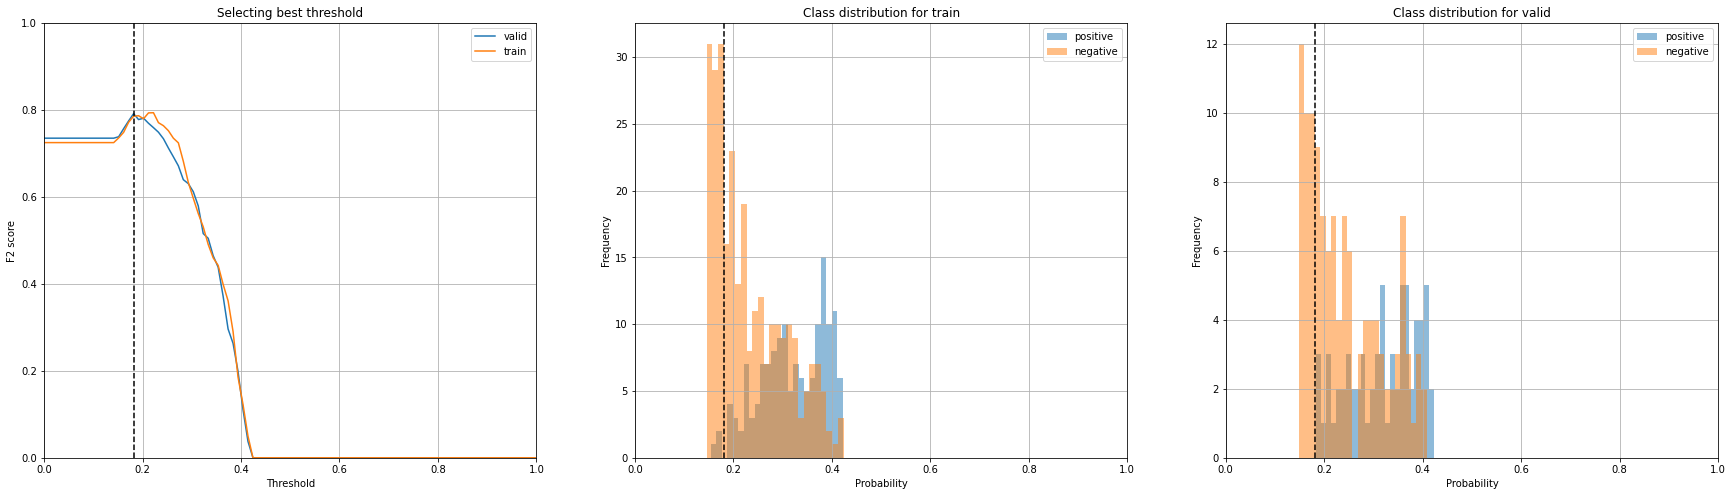

------------------- Main metric -------------------
[AUC] Train: 0.8105 - Valid: 0.7735 - Test: 0.8639
---------------- Secondary metrics ----------------
Using threshold = 0.1818
[PPV] Train: 0.4381 - Valid: 0.4314 - Test: 0.4500
[NPV] Train: 0.9694 - Valid: 1.0000 - Test: 1.0000
[SEN] Train: 0.9797 - Valid: 1.0000 - Test: 1.0000
[SPE] Train: 0.3381 - Valid: 0.2689 - Test: 0.3400
---------------- Confusion Matrix -----------------
Train: FP = 186 - TP = 145 - FN = 3 - TN = 95
Valid: FP = 87 - TP = 66 - FN = 0 - TN = 32
Test: FP = 66 - TP = 54 - FN = 0 - TN = 34
--------------- Threshold Selection ---------------
[F2S] Best f2 score for valid is 0.7914 @ threhsold = 0.1818


In [25]:
auc_train, auc_valid, auc_test = run_model(x_train=x_train, y_train=y_train, x_valid=x_valid, y_valid=y_valid, x_test=x_test, y_test=y_test,
                                            optimizer='adam',
                                            loss='binary_crossentropy',
                                            momentum=0,
                                            rho=0,
                                            beta_1=0,
                                            beta_2=0,
                                            learning_rate=0.1,
                                            decay_rate=0.5,
                                            batch_size=64,
                                            epochs=200,
                                            patience=20,
                                            min_delta=0.001,
                                            tensorboard_on=True,
                                            summary_on=True,
                                            tag='EX1',
                                            hidden_layers=1,
                                            units_per_layer=2,
                                            hidden_layer_activation='sigmoid',
                                            regularizer='l2',
                                            regularizer_lambda=1e-4,
                                            dropout_rate=0.0,
                                            use_batch_normalization=False)

In [26]:
# TensorBoard launch
%tensorboard --logdir tb-logs/mlp/

Reusing TensorBoard on port 6006 (pid 13568), started 0:40:54 ago. (Use '!kill 13568' to kill it.)

## Ejemplo #2 - Probando SGD
El momentum está **al máximo**. Esto significa que el entrenamiento será mejor frente a la presencia de platos. Seguimos con un modelo simple de dos neuronas en una misma capa oculta.

Model logs @ tb-logs/mlp/SGD1/20210531-173425
Model checkpoints @ checkpoints/mlp/20210531-173425
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 2)                 18        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 3         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


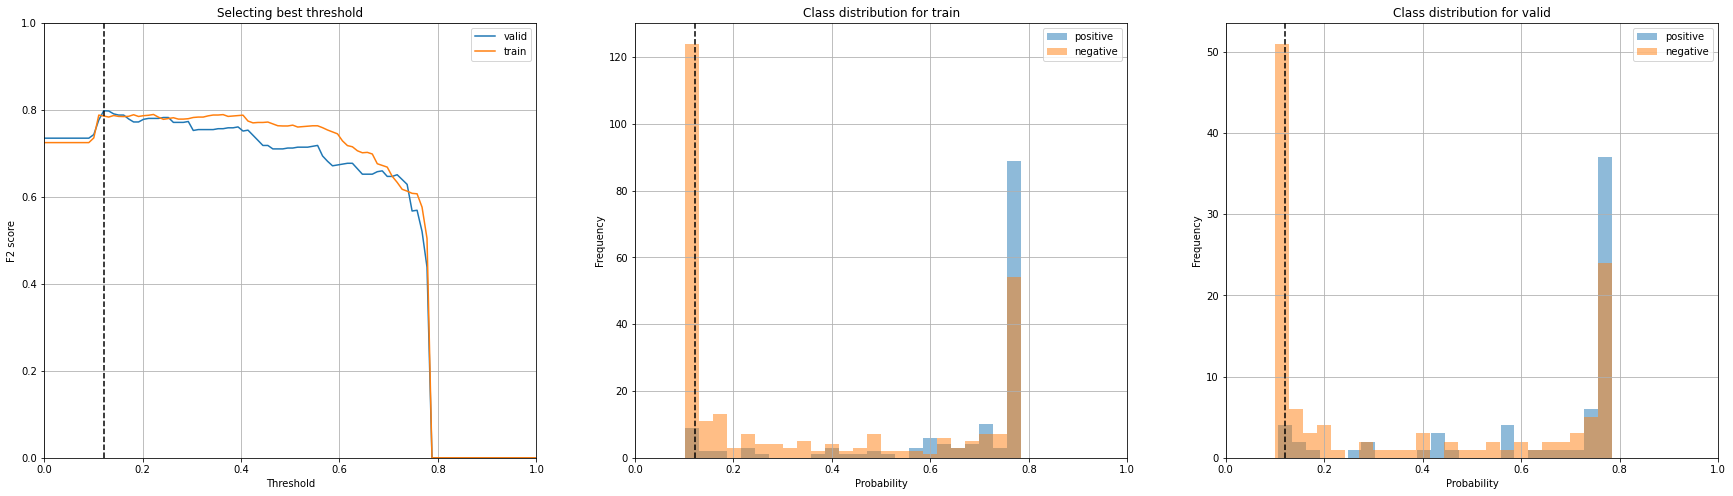

------------------- Main metric -------------------
[AUC] Train: 0.8190 - Valid: 0.7843 - Test: 0.8717
---------------- Secondary metrics ----------------
Using threshold = 0.1212
[PPV] Train: 0.4623 - Valid: 0.4672 - Test: 0.4696
[NPV] Train: 0.9435 - Valid: 0.9583 - Test: 1.0000
[SEN] Train: 0.9527 - Valid: 0.9697 - Test: 1.0000
[SPE] Train: 0.4164 - Valid: 0.3866 - Test: 0.3900
---------------- Confusion Matrix -----------------
Train: FP = 164 - TP = 141 - FN = 7 - TN = 117
Valid: FP = 73 - TP = 64 - FN = 2 - TN = 46
Test: FP = 61 - TP = 54 - FN = 0 - TN = 39
--------------- Threshold Selection ---------------
[F2S] Best f2 score for valid is 0.7980 @ threhsold = 0.1212


In [27]:
auc_train, auc_valid, auc_test = run_model(x_train=x_train, y_train=y_train, x_valid=x_valid, y_valid=y_valid, x_test=x_test, y_test=y_test,
                                            optimizer='sgd',
                                            loss='binary_crossentropy',
                                            momentum=1,
                                            rho=0,
                                            beta_1=0,
                                            beta_2=0,
                                            learning_rate=0.1,
                                            decay_rate=0.8,
                                            batch_size=32,
                                            epochs=200,
                                            patience=20,
                                            min_delta=0.01,
                                            tensorboard_on=True,
                                            summary_on=True,
                                            tag='SGD1',
                                            hidden_layers=1,
                                            units_per_layer=2,
                                            hidden_layer_activation='sigmoid',
                                            regularizer=None,
                                            regularizer_lambda=1e-4,
                                            dropout_rate=0.0,
                                            use_batch_normalization=False)

Mirando TensorBoard, se aprecia un comportamiento divergente en la loss de **train** y de **valid**.

## Ejemplo #3 - Probando Adam
Vemos que en este caso, Adam produce resultados MUY superiores, variando el momentum entre sus extremos.

Model logs @ tb-logs/mlp/EX3/20210531-173431
Model checkpoints @ checkpoints/mlp/20210531-173431
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 2)                 18        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 3         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


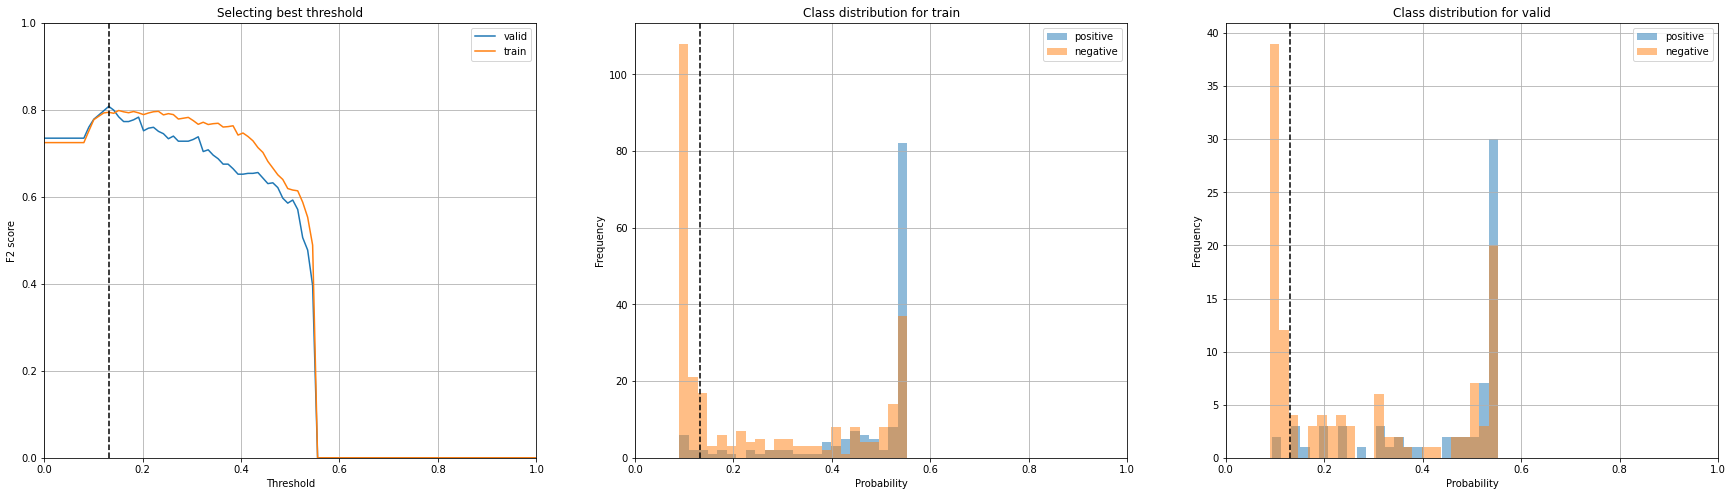

------------------- Main metric -------------------
[AUC] Train: 0.8223 - Valid: 0.7760 - Test: 0.8689
---------------- Secondary metrics ----------------
Using threshold = 0.1313
[PPV] Train: 0.4844 - Valid: 0.4848 - Test: 0.5143
[NPV] Train: 0.9429 - Valid: 0.9623 - Test: 1.0000
[SEN] Train: 0.9459 - Valid: 0.9697 - Test: 1.0000
[SPE] Train: 0.4698 - Valid: 0.4286 - Test: 0.4900
---------------- Confusion Matrix -----------------
Train: FP = 149 - TP = 140 - FN = 8 - TN = 132
Valid: FP = 68 - TP = 64 - FN = 2 - TN = 51
Test: FP = 51 - TP = 54 - FN = 0 - TN = 49
--------------- Threshold Selection ---------------
[F2S] Best f2 score for valid is 0.8081 @ threhsold = 0.1313


In [28]:
auc_train, auc_valid, auc_test = run_model(x_train=x_train, y_train=y_train, x_valid=x_valid, y_valid=y_valid, x_test=x_test, y_test=y_test,
                                            optimizer='adam',
                                            loss='binary_crossentropy',
                                            momentum=0,
                                            rho=0,
                                            beta_1=0.999,
                                            beta_2=0.99,
                                            learning_rate=0.098,
                                            decay_rate=0.8,
                                            batch_size=32,
                                            epochs=200,
                                            patience=20,
                                            min_delta=0.01,
                                            tensorboard_on=True,
                                            summary_on=True,
                                            tag='EX3',
                                            hidden_layers=1,
                                            units_per_layer=2,
                                            hidden_layer_activation='sigmoid',
                                            regularizer=None,
                                            regularizer_lambda=0,
                                            dropout_rate=0.0,
                                            use_batch_normalization=False)

## Ejemplo #4 - Se agregan L2 y Dropout
Además se disminuyen los *beta* del optimizador Adam.

Model logs @ tb-logs/mlp/EX4/20210531-173437
Model checkpoints @ checkpoints/mlp/20210531-173437
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 2)                 18        
_________________________________________________________________
dropout (Dropout)            (None, 2)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 3         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


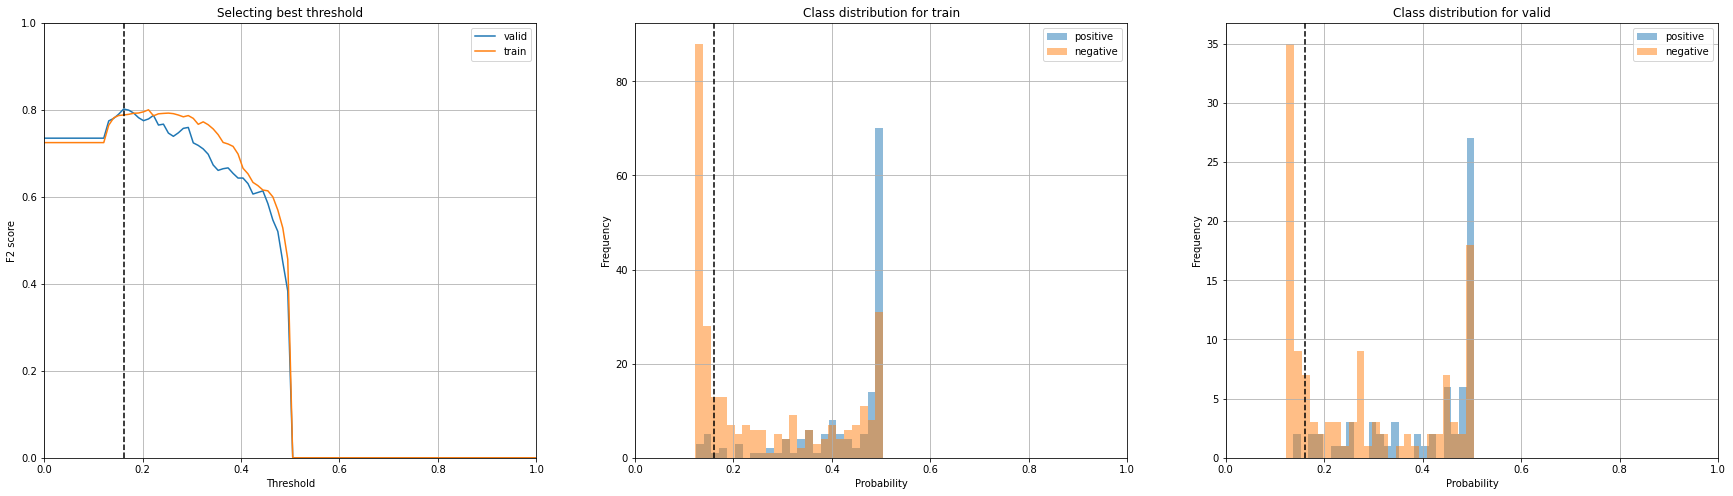

------------------- Main metric -------------------
[AUC] Train: 0.8207 - Valid: 0.7804 - Test: 0.8674
---------------- Secondary metrics ----------------
Using threshold = 0.1616
[PPV] Train: 0.4730 - Valid: 0.4741 - Test: 0.4953
[NPV] Train: 0.9398 - Valid: 0.9600 - Test: 0.9787
[SEN] Train: 0.9459 - Valid: 0.9697 - Test: 0.9815
[SPE] Train: 0.4448 - Valid: 0.4034 - Test: 0.4600
---------------- Confusion Matrix -----------------
Train: FP = 156 - TP = 140 - FN = 8 - TN = 125
Valid: FP = 71 - TP = 64 - FN = 2 - TN = 48
Test: FP = 54 - TP = 53 - FN = 1 - TN = 46
--------------- Threshold Selection ---------------
[F2S] Best f2 score for valid is 0.8020 @ threhsold = 0.1616


In [29]:
auc_train, auc_valid, auc_test = run_model(x_train=x_train, y_train=y_train, x_valid=x_valid, y_valid=y_valid, x_test=x_test, y_test=y_test,
                                            optimizer='adam',
                                            loss='binary_crossentropy',
                                            momentum=0,
                                            rho=0,
                                            beta_1=0.9,
                                            beta_2=0.9,
                                            learning_rate=0.098,
                                            decay_rate=0.8,
                                            batch_size=32,
                                            epochs=200,
                                            patience=30,
                                            min_delta=0.01,
                                            tensorboard_on=True,
                                            summary_on=True,
                                            tag='EX4',
                                            hidden_layers=1,
                                            units_per_layer=2,
                                            hidden_layer_activation='sigmoid',
                                            regularizer='l2',
                                            regularizer_lambda=1e-4,
                                            dropout_rate=0.2,
                                            use_batch_normalization=False)

Aumenta levemente la métrica en train, y lo mismo hace el overfitting.

## Ejemplo #5 - Caso límite: ¿Qué pasa si usamos probabilida de dropout = 1?
En ese caso, caen todas las neuronas. Por ende, el modelo predicirá la solución trivial.

Model logs @ tb-logs/mlp/EX5/20210531-194547
Model checkpoints @ checkpoints/mlp/20210531-194547
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 2)                 18        
_________________________________________________________________
dropout_5 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 3         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


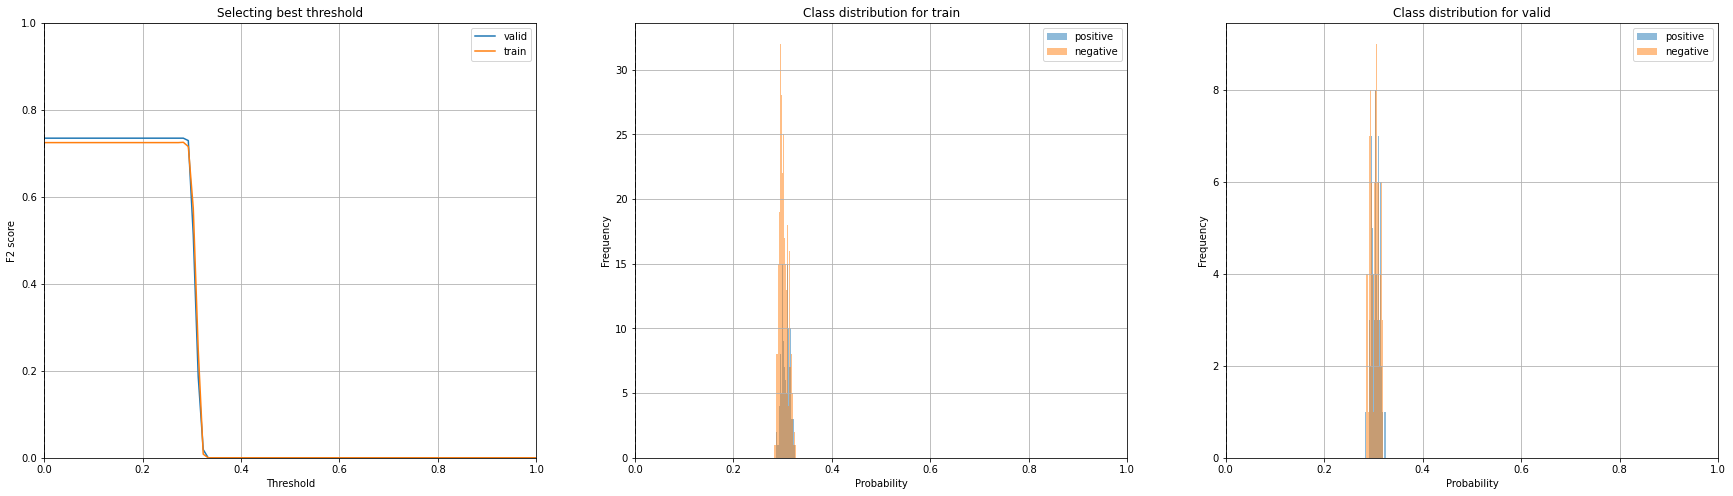

------------------- Main metric -------------------
[AUC] Train: 0.6363 - Valid: 0.5578 - Test: 0.6009
---------------- Secondary metrics ----------------
Using threshold = 0.0000
[PPV] Train: 0.3450 - Valid: 0.3568 - Test: 0.3506
[NPV] Train: nan - Valid: nan - Test: nan
[SEN] Train: 1.0000 - Valid: 1.0000 - Test: 1.0000
[SPE] Train: 0.0000 - Valid: 0.0000 - Test: 0.0000
---------------- Confusion Matrix -----------------
Train: FP = 281 - TP = 148 - FN = 0 - TN = 0
Valid: FP = 119 - TP = 66 - FN = 0 - TN = 0
Test: FP = 100 - TP = 54 - FN = 0 - TN = 0
--------------- Threshold Selection ---------------
[F2S] Best f2 score for valid is 0.7350 @ threhsold = 0.0000


In [47]:
auc_train, auc_valid, auc_test = run_model(x_train=x_train, y_train=y_train, x_valid=x_valid, y_valid=y_valid, x_test=x_test, y_test=y_test,
                                            optimizer='adam',
                                            loss='binary_crossentropy',
                                            momentum=0,
                                            rho=0,
                                            beta_1=0.9,
                                            beta_2=0.9,
                                            learning_rate=0.098,
                                            decay_rate=0.8,
                                            batch_size=32,
                                            epochs=200,
                                            patience=30,
                                            min_delta=0.01,
                                            tensorboard_on=True,
                                            summary_on=True,
                                            tag='EX5',
                                            hidden_layers=1,
                                            units_per_layer=2,
                                            hidden_layer_activation='sigmoid',
                                            regularizer='l2',
                                            regularizer_lambda=1e-7,
                                            dropout_rate=0.999,
                                            use_batch_normalization=False)

Del modelo anterior se observa que el dropout excesivo produce que se desactiven varias neuronas al entrenar, entorpeciendo el proceso. Luego el modelo clasifia todas las observaciones como negativas.

## Ejemplo #6 - Sacamos Dropout y ponemos Batch Normalization
Al mejor modelo obtenido hasta ahora, se le cambia dropout por batch normalization. Vemos que no existe mejora en el modelo.

Model logs @ tb-logs/mlp/EX6/20210531-173449
Model checkpoints @ checkpoints/mlp/20210531-173449
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 2)                 18        
_________________________________________________________________
batch_normalization (BatchNo (None, 2)                 8         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 3         
Total params: 29
Trainable params: 25
Non-trainable params: 4
_________________________________________________________________


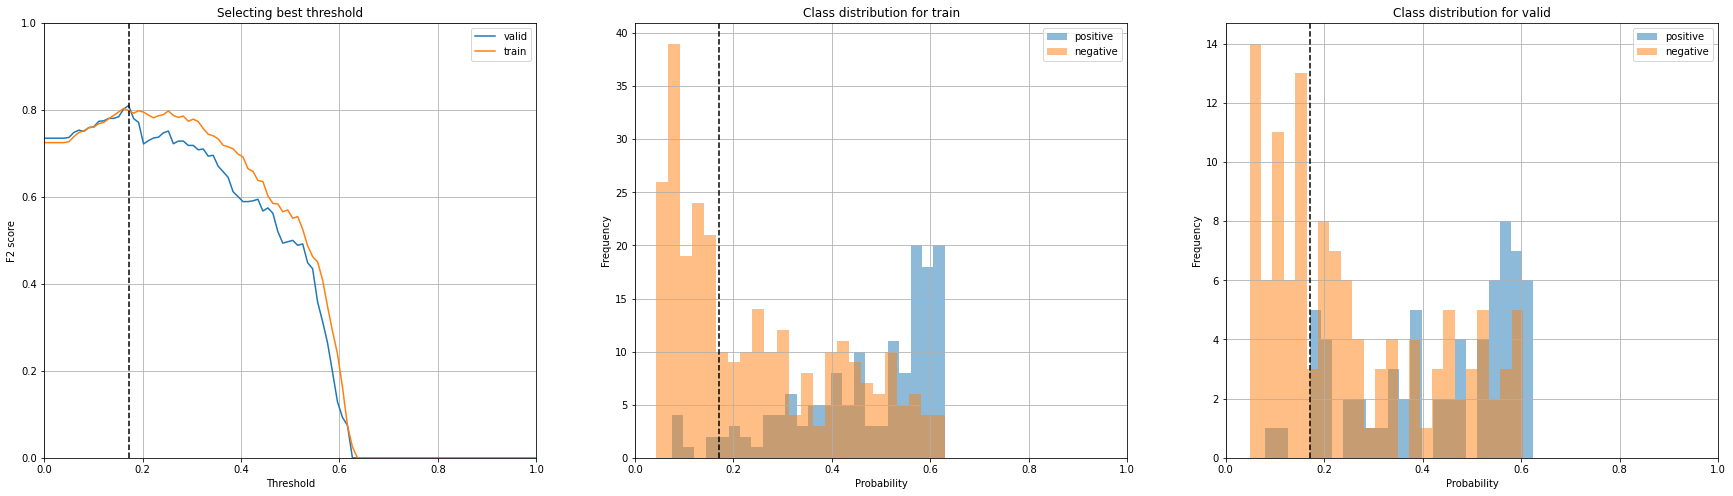

------------------- Main metric -------------------
[AUC] Train: 0.8331 - Valid: 0.7860 - Test: 0.8865
---------------- Secondary metrics ----------------
Using threshold = 0.1717
[PPV] Train: 0.4845 - Valid: 0.4885 - Test: 0.4909
[NPV] Train: 0.9493 - Valid: 0.9630 - Test: 1.0000
[SEN] Train: 0.9527 - Valid: 0.9697 - Test: 1.0000
[SPE] Train: 0.4662 - Valid: 0.4370 - Test: 0.4400
---------------- Confusion Matrix -----------------
Train: FP = 150 - TP = 141 - FN = 7 - TN = 131
Valid: FP = 67 - TP = 64 - FN = 2 - TN = 52
Test: FP = 56 - TP = 54 - FN = 0 - TN = 44
--------------- Threshold Selection ---------------
[F2S] Best f2 score for valid is 0.8101 @ threhsold = 0.1717


In [31]:
auc_train, auc_valid, auc_test = run_model(x_train=x_train, y_train=y_train, x_valid=x_valid, y_valid=y_valid, x_test=x_test, y_test=y_test,
                                            optimizer='adam',
                                            loss='binary_crossentropy',
                                            momentum=0,
                                            rho=0,
                                            beta_1=0.9,
                                            beta_2=0.9,
                                            learning_rate=0.098,
                                            decay_rate=0.8,
                                            batch_size=32,
                                            epochs=200,
                                            patience=30,
                                            min_delta=0.01,
                                            tensorboard_on=True,
                                            summary_on=True,
                                            tag='EX6',
                                            hidden_layers=1,
                                            units_per_layer=2,
                                            hidden_layer_activation='sigmoid',
                                            regularizer='l2',
                                            regularizer_lambda=1e-7,
                                            dropout_rate=0.0,
                                            use_batch_normalization=True)

## Ejemplo #7 - Cambio en la función de activación, manteniendo el mejor modelo.
Se cambia la función sigmoidea por una tangente hiperbólica.

Model logs @ tb-logs/mlp/EX7/20210531-173456
Model checkpoints @ checkpoints/mlp/20210531-173456
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 2)                 18        
_________________________________________________________________
batch_normalization_1 (Batch (None, 2)                 8         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 3         
Total params: 29
Trainable params: 25
Non-trainable params: 4
_________________________________________________________________


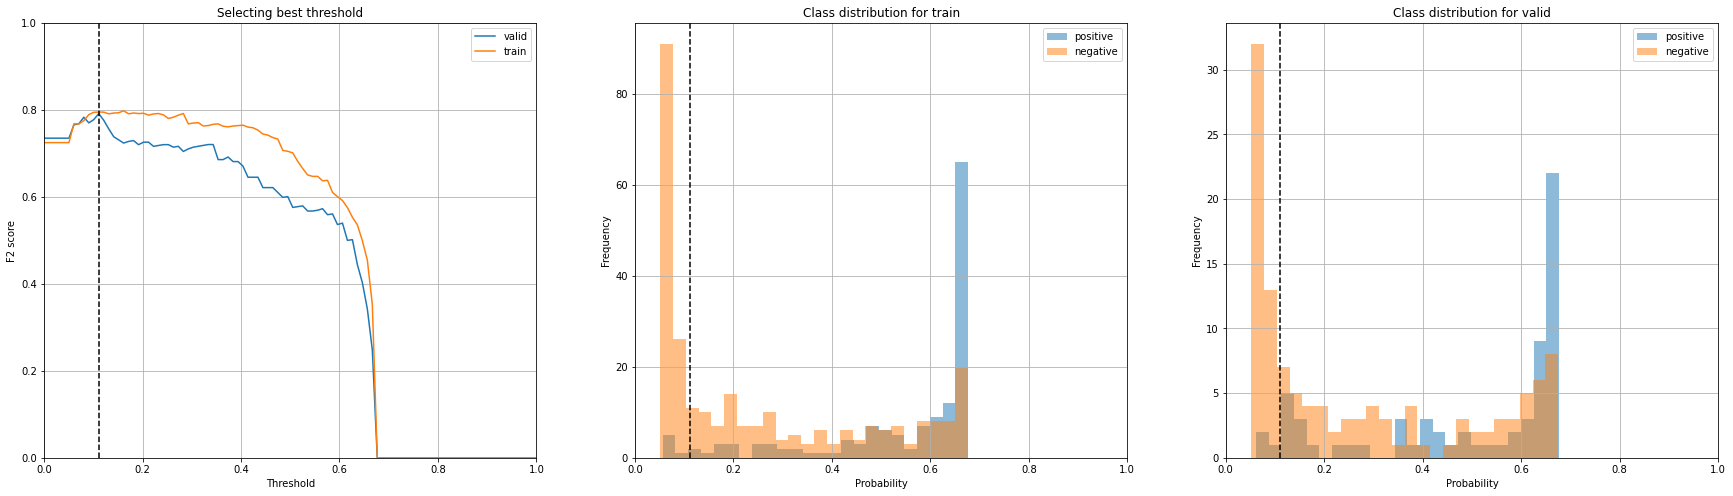

------------------- Main metric -------------------
[AUC] Train: 0.8371 - Valid: 0.7772 - Test: 0.8774
---------------- Secondary metrics ----------------
Using threshold = 0.1111
[PPV] Train: 0.4718 - Valid: 0.4701 - Test: 0.5000
[NPV] Train: 0.9531 - Valid: 0.9412 - Test: 1.0000
[SEN] Train: 0.9595 - Valid: 0.9545 - Test: 1.0000
[SPE] Train: 0.4342 - Valid: 0.4034 - Test: 0.4600
---------------- Confusion Matrix -----------------
Train: FP = 159 - TP = 142 - FN = 6 - TN = 122
Valid: FP = 71 - TP = 63 - FN = 3 - TN = 48
Test: FP = 54 - TP = 54 - FN = 0 - TN = 46
--------------- Threshold Selection ---------------
[F2S] Best f2 score for valid is 0.7915 @ threhsold = 0.1111


In [32]:
auc_train, auc_valid, auc_test = run_model(x_train=x_train, y_train=y_train, x_valid=x_valid, y_valid=y_valid, x_test=x_test, y_test=y_test,
                                            optimizer='adam',
                                            loss='binary_crossentropy',
                                            momentum=0.,
                                            rho=0,
                                            beta_1=0.9,
                                            beta_2=0.9,
                                            learning_rate=0.098,
                                            decay_rate=0.8,
                                            batch_size=32,
                                            epochs=200,
                                            patience=30,
                                            min_delta=0.01,
                                            tensorboard_on=True,
                                            summary_on=True,
                                            tag='EX7',
                                            hidden_layers=1,
                                            units_per_layer=2,
                                            hidden_layer_activation='tanh',
                                            regularizer='l2',
                                            regularizer_lambda=1e-7,
                                            dropout_rate=0,
                                            use_batch_normalization=True)

Los resultados son similares a emplear la sigmoidea.

Por otro lado, se prueba la **Leaky ReLU**.

Model logs @ tb-logs/mlp/EX7_1/20210531-173504
Model checkpoints @ checkpoints/mlp/20210531-173504
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 2)                 18        
_________________________________________________________________
batch_normalization_2 (Batch (None, 2)                 8         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 3         
Total params: 29
Trainable params: 25
Non-trainable params: 4
_________________________________________________________________


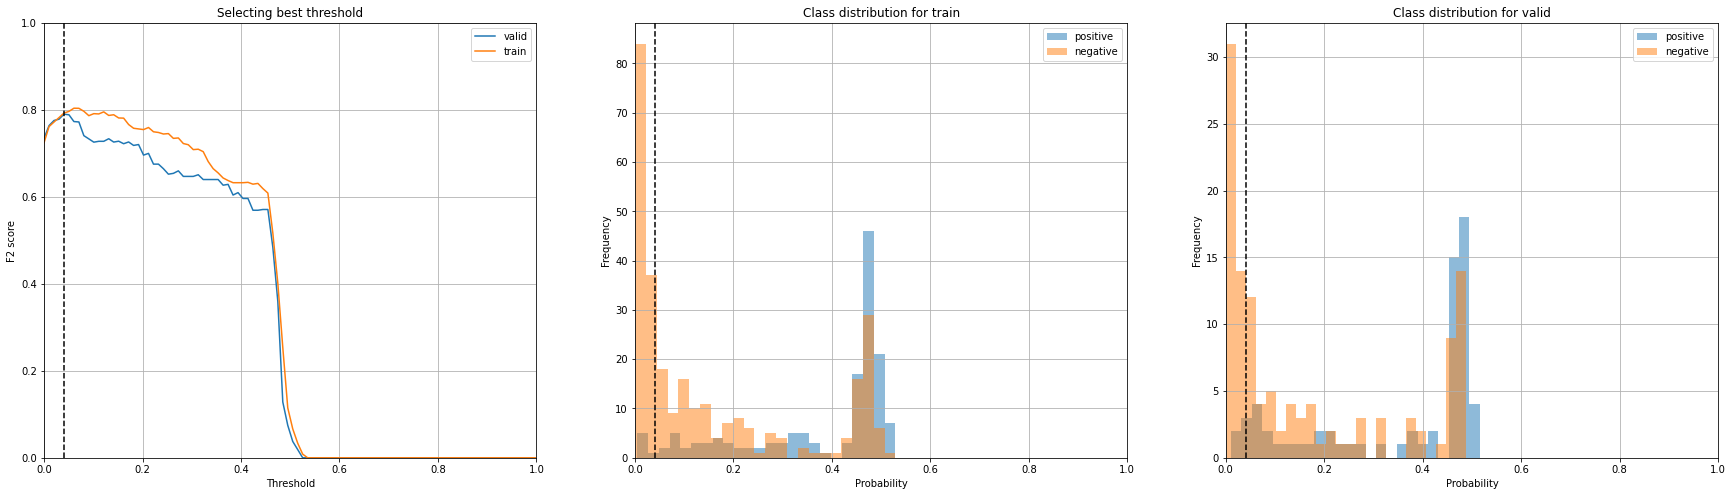

------------------- Main metric -------------------
[AUC] Train: 0.8304 - Valid: 0.7855 - Test: 0.8750
---------------- Secondary metrics ----------------
Using threshold = 0.0404
[PPV] Train: 0.4613 - Valid: 0.4539 - Test: 0.4865
[NPV] Train: 0.9580 - Valid: 0.9545 - Test: 1.0000
[SEN] Train: 0.9662 - Valid: 0.9697 - Test: 1.0000
[SPE] Train: 0.4057 - Valid: 0.3529 - Test: 0.4300
---------------- Confusion Matrix -----------------
Train: FP = 167 - TP = 143 - FN = 5 - TN = 114
Valid: FP = 77 - TP = 64 - FN = 2 - TN = 42
Test: FP = 57 - TP = 54 - FN = 0 - TN = 43
--------------- Threshold Selection ---------------
[F2S] Best f2 score for valid is 0.7901 @ threhsold = 0.0404


In [33]:
from keras.layers import LeakyReLU
auc_train, auc_valid, auc_test = run_model(x_train=x_train, y_train=y_train, x_valid=x_valid, y_valid=y_valid, x_test=x_test, y_test=y_test,
                                            optimizer='adam',
                                            loss='binary_crossentropy',
                                            momentum=0.01,
                                            rho=0,
                                            beta_1=0.9,
                                            beta_2=0.9,
                                            learning_rate=0.098,
                                            decay_rate=0.8,
                                            batch_size=32,
                                            epochs=200,
                                            patience=30,
                                            min_delta=0.01,
                                            tensorboard_on=True,
                                            summary_on=True,
                                            tag='EX7_1',
                                            hidden_layers=1,
                                            units_per_layer=2,
                                            hidden_layer_activation=LeakyReLU(alpha=0.04),
                                            regularizer='l2',
                                            regularizer_lambda=1e-7,
                                            dropout_rate=0,
                                            use_batch_normalization=True)

## Ejemplo #8 - Cambio en la topología de la red

Model logs @ tb-logs/mlp/EX8/20210531-173511
Model checkpoints @ checkpoints/mlp/20210531-173511
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                90        
_________________________________________________________________
batch_normalization_3 (Batch (None, 10)                40        
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
batch_normalization_4 (Batch (None, 10)                40        
_________________________________________________________________
dense_23 (Dense)             (None, 10)                110       
_________________________________________________________________
batch_normalization_5 (Batch (None, 10)                40        
_______________________

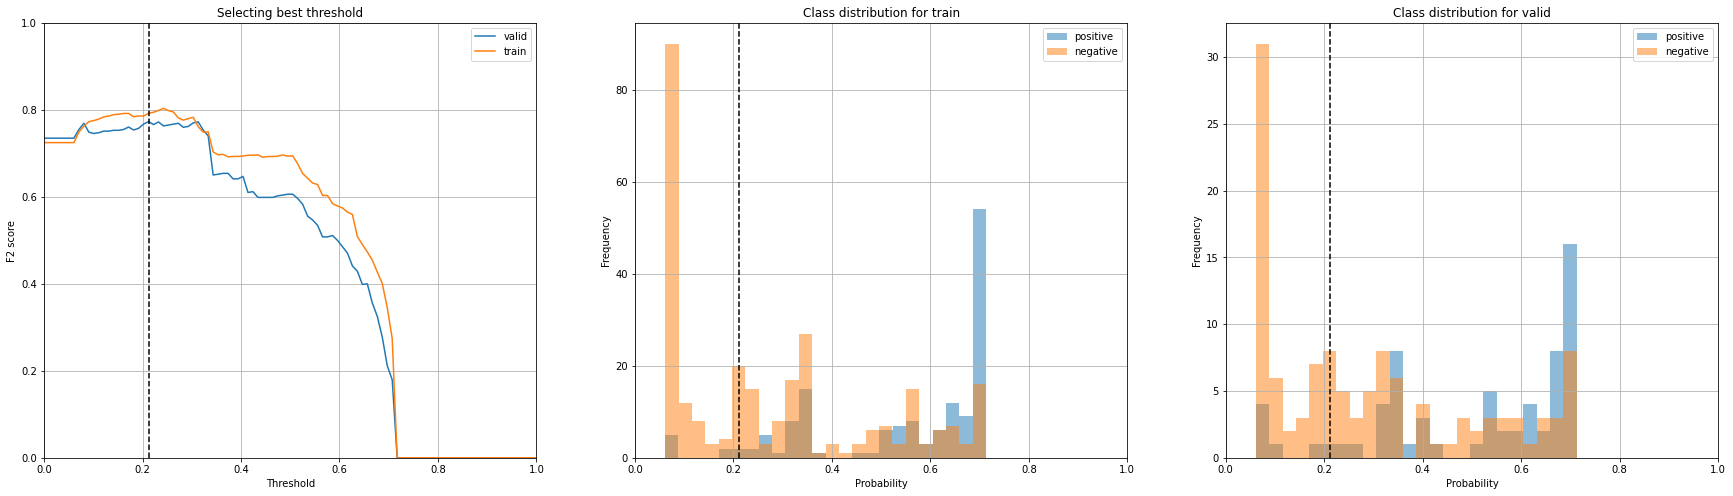

------------------- Main metric -------------------
[AUC] Train: 0.8190 - Valid: 0.7688 - Test: 0.8519
---------------- Secondary metrics ----------------
Using threshold = 0.2121
[PPV] Train: 0.4732 - Valid: 0.4839 - Test: 0.4771
[NPV] Train: 0.9466 - Valid: 0.9016 - Test: 0.9556
[SEN] Train: 0.9527 - Valid: 0.9091 - Test: 0.9630
[SPE] Train: 0.4413 - Valid: 0.4622 - Test: 0.4300
---------------- Confusion Matrix -----------------
Train: FP = 157 - TP = 141 - FN = 7 - TN = 124
Valid: FP = 64 - TP = 60 - FN = 6 - TN = 55
Test: FP = 57 - TP = 52 - FN = 2 - TN = 43
--------------- Threshold Selection ---------------
[F2S] Best f2 score for valid is 0.7732 @ threhsold = 0.2121


In [34]:
auc_train, auc_valid, auc_test = run_model(x_train=x_train, y_train=y_train, x_valid=x_valid, y_valid=y_valid, x_test=x_test, y_test=y_test,
                                            optimizer='adam',
                                            loss='binary_crossentropy',
                                            momentum=0,
                                            rho=0,
                                            beta_1=0.9,
                                            beta_2=0.9,
                                            learning_rate=0.098,
                                            decay_rate=0.8,
                                            batch_size=32,
                                            epochs=200,
                                            patience=30,
                                            min_delta=0.01,
                                            tensorboard_on=True,
                                            summary_on=True,
                                            tag='EX8',
                                            hidden_layers=3,
                                            units_per_layer=10,
                                            hidden_layer_activation='tanh',
                                            regularizer='l2',
                                            regularizer_lambda=1e-7,
                                            dropout_rate=0,
                                            use_batch_normalization=True)

Para este caso, el umbral que maximiza el f2-score es muy bajo.

## Ejemplo #9 - Cambio en topología de red #2

Model logs @ tb-logs/mlp/EX9/20210531-173521
Model checkpoints @ checkpoints/mlp/20210531-173521
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 50)                450       
_________________________________________________________________
batch_normalization_6 (Batch (None, 50)                200       
_________________________________________________________________
dense_26 (Dense)             (None, 50)                2550      
_________________________________________________________________
batch_normalization_7 (Batch (None, 50)                200       
_________________________________________________________________
dense_27 (Dense)             (None, 50)                2550      
_________________________________________________________________
batch_normalization_8 (Batch (None, 50)                200       
______________________

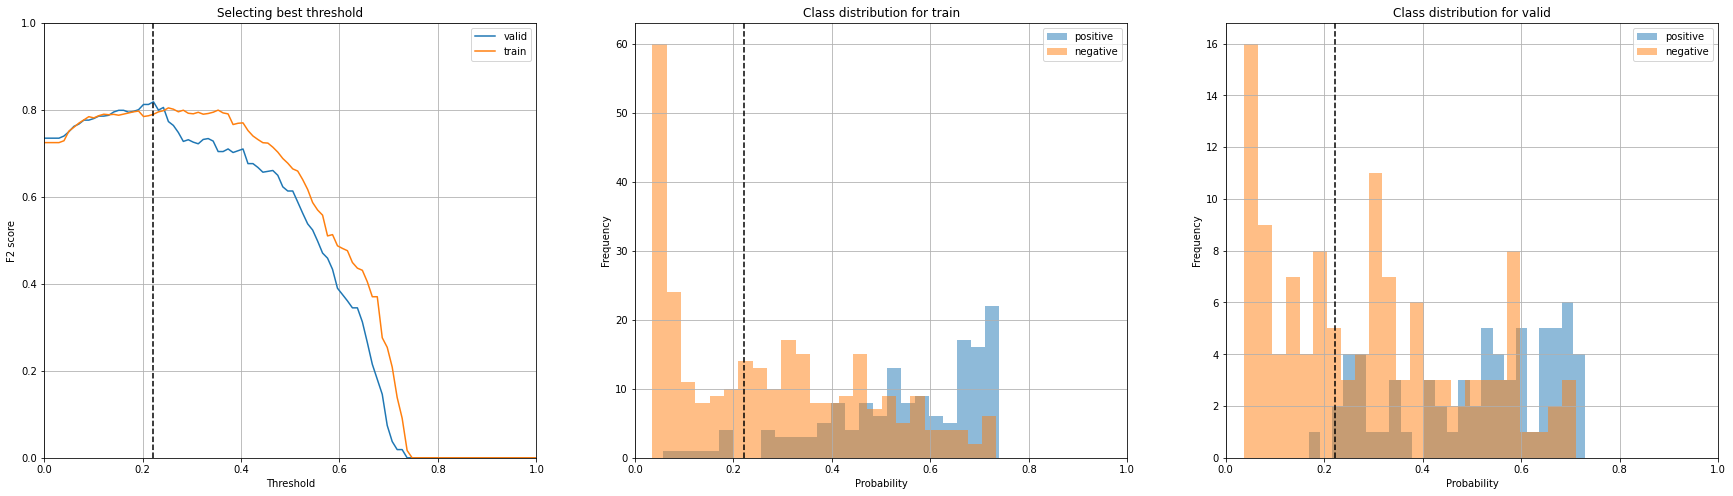

------------------- Main metric -------------------
[AUC] Train: 0.8508 - Valid: 0.8000 - Test: 0.8885
---------------- Secondary metrics ----------------
Using threshold = 0.2222
[PPV] Train: 0.4762 - Valid: 0.4887 - Test: 0.5196
[NPV] Train: 0.9407 - Valid: 0.9808 - Test: 0.9808
[SEN] Train: 0.9459 - Valid: 0.9848 - Test: 0.9815
[SPE] Train: 0.4520 - Valid: 0.4286 - Test: 0.5100
---------------- Confusion Matrix -----------------
Train: FP = 154 - TP = 140 - FN = 8 - TN = 127
Valid: FP = 68 - TP = 65 - FN = 1 - TN = 51
Test: FP = 49 - TP = 53 - FN = 1 - TN = 51
--------------- Threshold Selection ---------------
[F2S] Best f2 score for valid is 0.8186 @ threhsold = 0.2222


In [35]:
auc_train, auc_valid, auc_test = run_model(x_train=x_train, y_train=y_train, x_valid=x_valid, y_valid=y_valid, x_test=x_test, y_test=y_test,
                                            optimizer='adam',
                                            loss='binary_crossentropy',
                                            momentum=0,
                                            rho=0.0,
                                            beta_1=0.99,
                                            beta_2=0.99,
                                            learning_rate=0.098,
                                            decay_rate=0.8,
                                            batch_size=32,
                                            epochs=2000,
                                            patience=30,
                                            min_delta=0.01,
                                            tensorboard_on=True,
                                            summary_on=True,
                                            tag='EX9',
                                            hidden_layers=3,
                                            units_per_layer=50,
                                            hidden_layer_activation='tanh',
                                            regularizer='l1',
                                            regularizer_lambda=1e-2,
                                            dropout_rate=0,
                                            use_batch_normalization=True)

## Ejemplo #10 - Cambio a rmsprop

Model logs @ tb-logs/mlp/EX10/20210531-173532
Model checkpoints @ checkpoints/mlp/20210531-173532
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 50)                450       
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 51        
Total params: 3,051
Trainable params: 3,051
Non-trainable params: 0
_________________________________________________________________


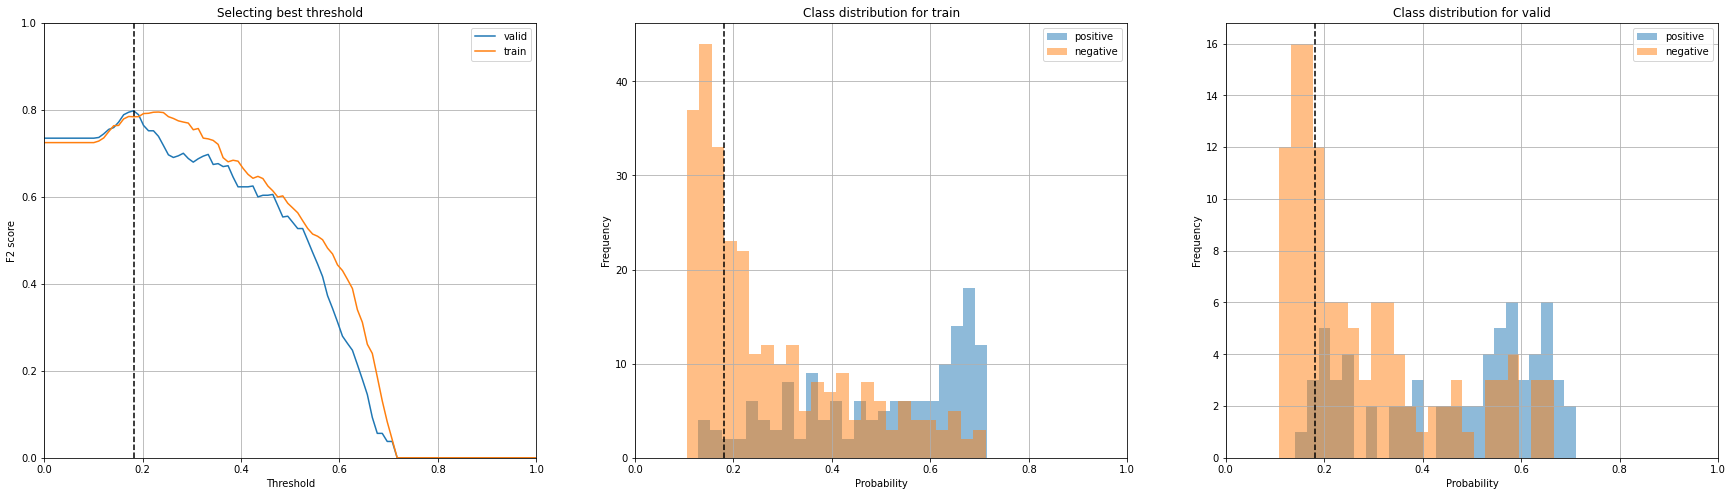

------------------- Main metric -------------------
[AUC] Train: 0.8321 - Valid: 0.7900 - Test: 0.8815
---------------- Secondary metrics ----------------
Using threshold = 0.1818
[PPV] Train: 0.4593 - Valid: 0.4672 - Test: 0.4865
[NPV] Train: 0.9426 - Valid: 0.9583 - Test: 1.0000
[SEN] Train: 0.9527 - Valid: 0.9697 - Test: 1.0000
[SPE] Train: 0.4093 - Valid: 0.3866 - Test: 0.4300
---------------- Confusion Matrix -----------------
Train: FP = 166 - TP = 141 - FN = 7 - TN = 115
Valid: FP = 73 - TP = 64 - FN = 2 - TN = 46
Test: FP = 57 - TP = 54 - FN = 0 - TN = 43
--------------- Threshold Selection ---------------
[F2S] Best f2 score for valid is 0.7980 @ threhsold = 0.1818


In [36]:
auc_train, auc_valid, auc_test = run_model(x_train=x_train, y_train=y_train, x_valid=x_valid, y_valid=y_valid, x_test=x_test, y_test=y_test,
                                            optimizer='rmsprop',
                                            loss='binary_crossentropy',
                                            momentum=0.1,
                                            rho=0.8,
                                            beta_1=0,
                                            beta_2=0,
                                            learning_rate=0.098,
                                            decay_rate=0.8,
                                            batch_size=32,
                                            epochs=2000,
                                            patience=30,
                                            min_delta=0.01,
                                            tensorboard_on=True,
                                            summary_on=True,
                                            tag='EX10',
                                            hidden_layers=2,
                                            units_per_layer=50,
                                            hidden_layer_activation='tanh',
                                            regularizer='l1',
                                            regularizer_lambda=1e-2,
                                            dropout_rate=0.2,
                                            use_batch_normalization=False)

# Using HyperOpt

In [37]:
import hyperopt

In [38]:
from hyperopt.pyll import scope

In [39]:
from src import mlp_helper

In [40]:
def objective(kwargs):
    """ Objective function for the hyperopt algorithm. """
    
    # Setting some fixed values
    kwargs['tensorboard_on'] = False
    kwargs['summary_on'] = False
    kwargs['epochs'] = 500
    kwargs['batch_size'] = 64
    kwargs['optimizer'] = 'adam'
    kwargs['beta_1'] = 0.9
    kwargs['beta_2'] = 0.9
    kwargs['dropout_rate'] = 0
    
    # Running the model with the given hyperparameters and retrieving the test set performance
    # WARNING! We're using the same valid set for both valid and test, but can be ignored, it does not affect
    # because it was something we had to do to reuse the function...
    _, _, eval_test = mlp_helper.run_model(x_train, y_train, x_valid, y_valid, x_valid, y_valid, **kwargs)
    auc_test = eval_test['auc']
    return (-1*auc_test)

In [41]:
space = {
    'use_batch_normalization': hyperopt.hp.choice('use_batch_normalization', [False, True]),
    'learning_rate': hyperopt.hp.choice('learning_rate', [1.0, 0.5, 0.1, 0.01]),
    'hidden_layers': scope.int(hyperopt.hp.quniform('hidden_layers', 1, 10, 1)),
    'units_per_layer': scope.int(hyperopt.hp.quniform('units_per_layer', 2, 100, 8)),
    'hidden_layer_activation': hyperopt.hp.choice('hidden_layer_activation', ['relu', 'tanh','sigmoid'])
    #'regularizer': hyperopt.hp.choice('regularizer', ['l1', 'l2']),
    #'regularizer_lambda': hyperopt.hp.choice('regularizer_lambda', [1, 1e-2, 1e-3, 1e-5, 1e-7])
}

In [89]:
algorithm = hyperopt.tpe.suggest

In [90]:
trials = hyperopt.Trials()
best = hyperopt.fmin(objective, space, algo=algorithm, max_evals=200, trials=trials)

100%|█████████████████████████████████████████████| 200/200 [16:35<00:00,  4.98s/trial, best loss: -0.8270944741532976]


In [91]:
best

{'hidden_layer_activation': 2,
 'hidden_layers': 1.0,
 'learning_rate': 1,
 'units_per_layer': 64.0,
 'use_batch_normalization': 0}

Model logs @ tb-logs/mlp/BEST1/20210531-173540
Model checkpoints @ checkpoints/mlp/20210531-173540
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 80)                720       
_________________________________________________________________
batch_normalization_9 (Batch (None, 80)                320       
_________________________________________________________________
dense_33 (Dense)             (None, 80)                6480      
_________________________________________________________________
batch_normalization_10 (Batc (None, 80)                320       
_________________________________________________________________
dense_34 (Dense)             (None, 80)                6480      
_________________________________________________________________
batch_normalization_11 (Batc (None, 80)                320       
____________________

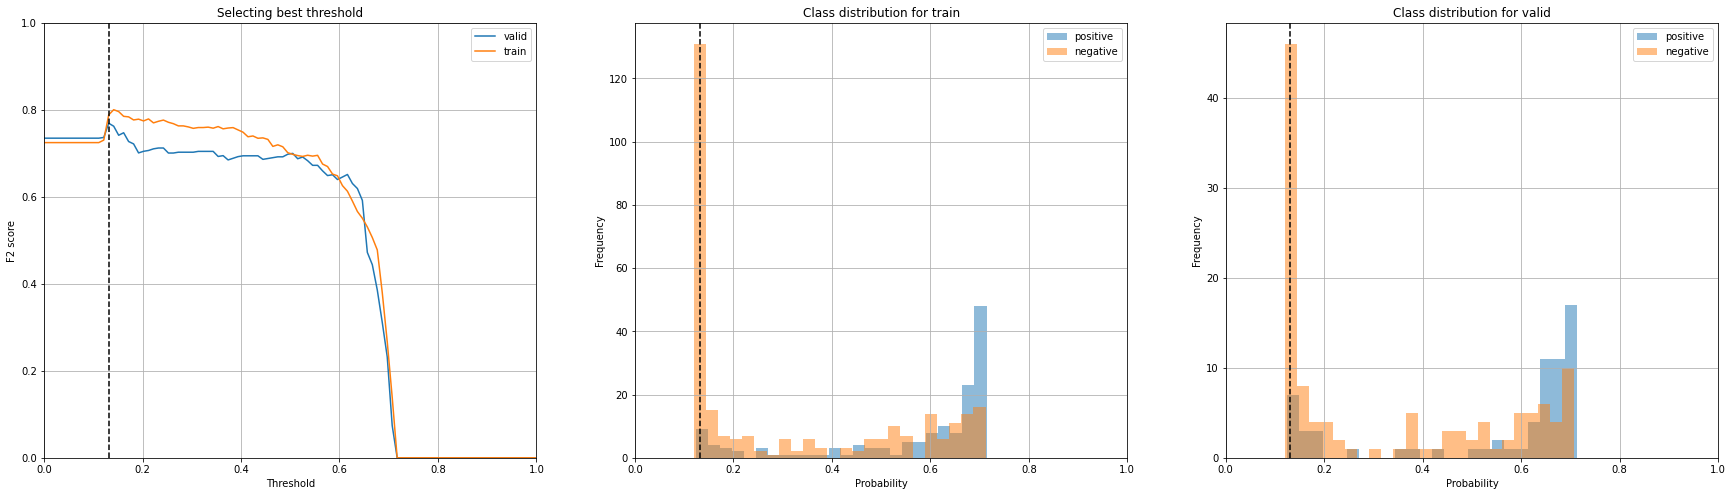

------------------- Main metric -------------------
[AUC] Train: 0.8196 - Valid: 0.7688 - Test: 0.8683
---------------- Secondary metrics ----------------
Using threshold = 0.1313
[PPV] Train: 0.4486 - Valid: 0.4211 - Test: 0.4538
[NPV] Train: 0.9630 - Valid: 0.9394 - Test: 1.0000
[SEN] Train: 0.9730 - Valid: 0.9697 - Test: 1.0000
[SPE] Train: 0.3701 - Valid: 0.2605 - Test: 0.3500
---------------- Confusion Matrix -----------------
Train: FP = 177 - TP = 144 - FN = 4 - TN = 104
Valid: FP = 88 - TP = 64 - FN = 2 - TN = 31
Test: FP = 65 - TP = 54 - FN = 0 - TN = 35
--------------- Threshold Selection ---------------
[F2S] Best f2 score for valid is 0.7692 @ threhsold = 0.1313


In [42]:
# 100/100 [10:26<00:00,  6.27s/trial, best loss: -0.8358798064680418]
auc_train, auc_valid, auc_test = run_model(x_train=x_train, y_train=y_train, x_valid=x_valid, y_valid=y_valid, x_test=x_test, y_test=y_test,
                                            optimizer='adam',
                                            loss='binary_crossentropy',
                                            beta_1=0.9,
                                            beta_2=0.9,
                                            learning_rate=0.01,
                                            batch_size=64,
                                            epochs=500,
                                            patience=30,
                                            tensorboard_on=True,
                                            summary_on=True,
                                            tag='BEST1',
                                            hidden_layers=6,
                                            units_per_layer=80,
                                            hidden_layer_activation='tanh',
                                            use_batch_normalization=True)

Model logs @ tb-logs/mlp/BEST2/20210531-173551
Model checkpoints @ checkpoints/mlp/20210531-173551
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 40)                360       
_________________________________________________________________
batch_normalization_15 (Batc (None, 40)                160       
_________________________________________________________________
dense_40 (Dense)             (None, 40)                1640      
_________________________________________________________________
batch_normalization_16 (Batc (None, 40)                160       
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 41        
Total params: 2,361
Trainable params: 2,201
Non-trainable params: 160
_________________________________________________________________


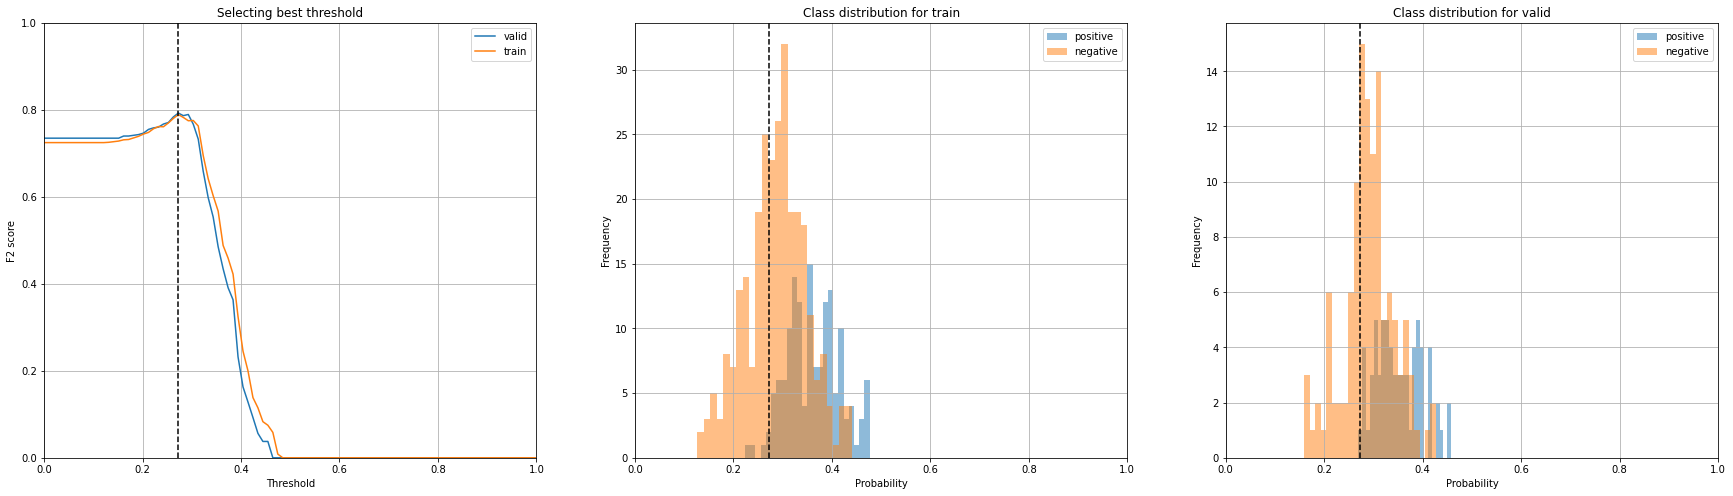

------------------- Main metric -------------------
[AUC] Train: 0.8223 - Valid: 0.8159 - Test: 0.8752
---------------- Secondary metrics ----------------
Using threshold = 0.2727
[PPV] Train: 0.4554 - Valid: 0.4452 - Test: 0.4737
[NPV] Train: 0.9565 - Valid: 0.9744 - Test: 1.0000
[SEN] Train: 0.9662 - Valid: 0.9848 - Test: 1.0000
[SPE] Train: 0.3915 - Valid: 0.3193 - Test: 0.4000
---------------- Confusion Matrix -----------------
Train: FP = 171 - TP = 143 - FN = 5 - TN = 110
Valid: FP = 81 - TP = 65 - FN = 1 - TN = 38
Test: FP = 60 - TP = 54 - FN = 0 - TN = 40
--------------- Threshold Selection ---------------
[F2S] Best f2 score for valid is 0.7927 @ threhsold = 0.2727


In [43]:
# 100%|████████████████████████████████████████████| 100/100 [08:46<00:00,  5.27s/trial, best loss: -0.8156353450471097]
auc_train, auc_valid, auc_test = run_model(x_train=x_train, y_train=y_train, x_valid=x_valid, y_valid=y_valid, x_test=x_test, y_test=y_test,
                                            optimizer='adam',
                                            loss='binary_crossentropy',
                                            beta_1=0.9,
                                            beta_2=0.9,
                                            learning_rate=1,
                                            batch_size=64,
                                            epochs=500,
                                            patience=30,
                                            tensorboard_on=True,
                                            summary_on=True,
                                            tag='BEST2',
                                            regularizer='l1',
                                            regularizer_lambda=1e-2,
                                            hidden_layers=2,
                                            units_per_layer=40,
                                            hidden_layer_activation='relu',
                                            use_batch_normalization=True)

Model logs @ tb-logs/mlp/BEST2/20210531-173559
Model checkpoints @ checkpoints/mlp/20210531-173559
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 30)                270       
_________________________________________________________________
batch_normalization_17 (Batc (None, 30)                120       
_________________________________________________________________
dense_43 (Dense)             (None, 30)                930       
_________________________________________________________________
batch_normalization_18 (Batc (None, 30)                120       
_________________________________________________________________
dense_44 (Dense)             (None, 30)                930       
_________________________________________________________________
batch_normalization_19 (Batc (None, 30)                120       
____________________

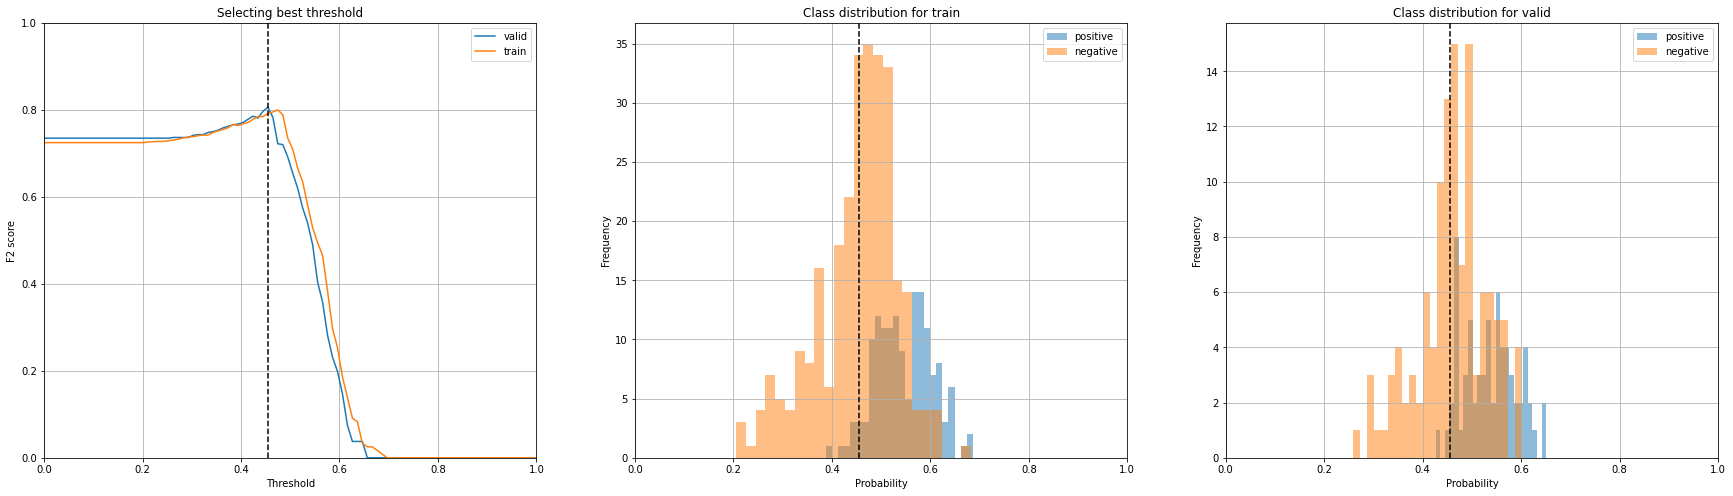

------------------- Main metric -------------------
[AUC] Train: 0.8354 - Valid: 0.8048 - Test: 0.8976
---------------- Secondary metrics ----------------
Using threshold = 0.4545
[PPV] Train: 0.4716 - Valid: 0.4812 - Test: 0.5094
[NPV] Train: 0.9462 - Valid: 0.9615 - Test: 1.0000
[SEN] Train: 0.9527 - Valid: 0.9697 - Test: 1.0000
[SPE] Train: 0.4377 - Valid: 0.4202 - Test: 0.4800
---------------- Confusion Matrix -----------------
Train: FP = 158 - TP = 141 - FN = 7 - TN = 123
Valid: FP = 69 - TP = 64 - FN = 2 - TN = 50
Test: FP = 52 - TP = 54 - FN = 0 - TN = 48
--------------- Threshold Selection ---------------
[F2S] Best f2 score for valid is 0.8060 @ threhsold = 0.4545


In [44]:
#100%|█████████████████████████████████████████████| 200/200 [18:49<00:00,  5.65s/trial, best loss: -0.8209829386299974]
auc_train, auc_valid, auc_test = run_model(x_train=x_train, y_train=y_train, x_valid=x_valid, y_valid=y_valid, x_test=x_test, y_test=y_test,
                                            optimizer='adam',
                                            loss='binary_crossentropy',
                                            beta_1=0.9,
                                            beta_2=0.9,
                                            learning_rate=0.5,
                                            batch_size=64,
                                            epochs=500,
                                            patience=30,
                                            tensorboard_on=True,
                                            summary_on=True,
                                            tag='BEST2',
                                            regularizer='l2',
                                            regularizer_lambda=1e-2,
                                            hidden_layers=4,
                                            units_per_layer=30,
                                            hidden_layer_activation='relu',
                                            use_batch_normalization=True)

Model logs @ tb-logs/mlp/BEST4/20210531-173609
Model checkpoints @ checkpoints/mlp/20210531-173609
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 65        
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


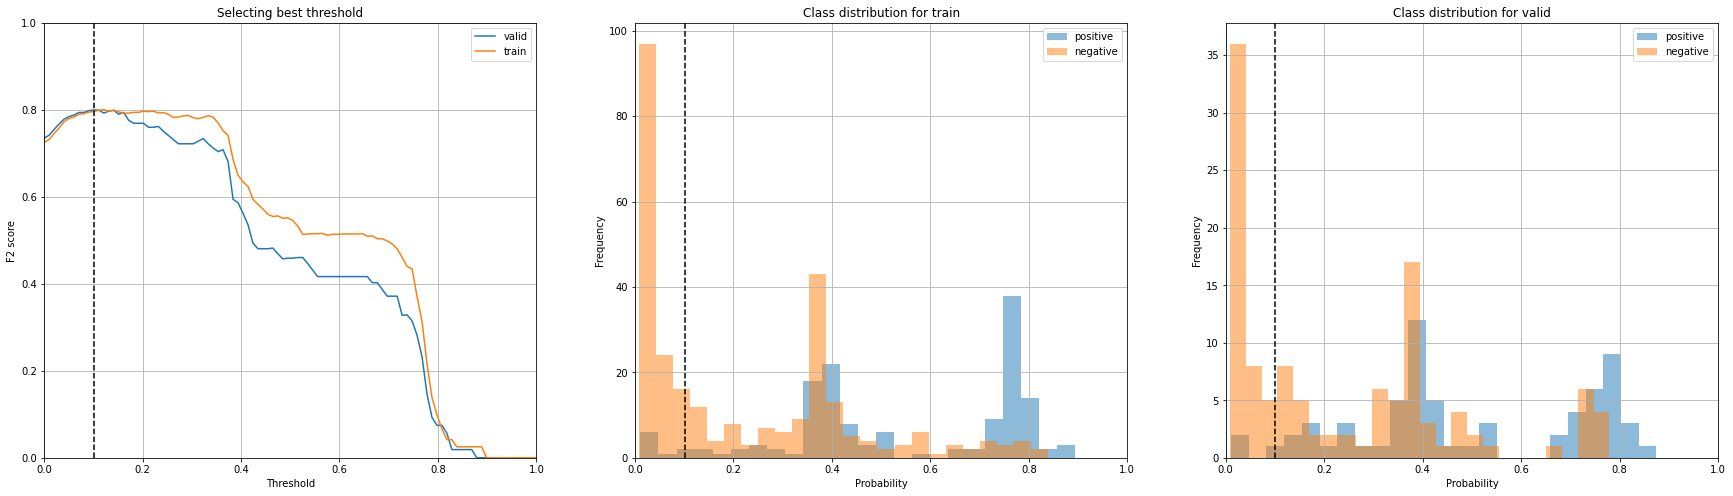

------------------- Main metric -------------------
[AUC] Train: 0.8319 - Valid: 0.7862 - Test: 0.8806
---------------- Secondary metrics ----------------
Using threshold = 0.1010
[PPV] Train: 0.4878 - Valid: 0.4706 - Test: 0.4909
[NPV] Train: 0.9437 - Valid: 0.9592 - Test: 1.0000
[SEN] Train: 0.9459 - Valid: 0.9697 - Test: 1.0000
[SPE] Train: 0.4769 - Valid: 0.3950 - Test: 0.4400
---------------- Confusion Matrix -----------------
Train: FP = 147 - TP = 140 - FN = 8 - TN = 134
Valid: FP = 72 - TP = 64 - FN = 2 - TN = 47
Test: FP = 56 - TP = 54 - FN = 0 - TN = 44
--------------- Threshold Selection ---------------
[F2S] Best f2 score for valid is 0.8000 @ threhsold = 0.1010


In [45]:
#100%|█████████████████████████████████████████████| 200/200 [18:49<00:00,  5.65s/trial, best loss: -0.8209829386299974]
auc_train, auc_valid, auc_test = run_model(x_train=x_train, y_train=y_train, x_valid=x_valid, y_valid=y_valid, x_test=x_test, y_test=y_test,
                                            optimizer='adam',
                                            loss='binary_crossentropy',
                                            beta_1=0.9,
                                            beta_2=0.9,
                                            learning_rate=0.5,
                                            batch_size=64,
                                            epochs=500,
                                            patience=30,
                                            tensorboard_on=True,
                                            summary_on=True,
                                            tag='BEST4',
                                            hidden_layers=1,
                                            units_per_layer=64,
                                            hidden_layer_activation='sigmoid',
                                            use_batch_normalization=False)